# Load data

In [1]:
import pandas as pd

In [2]:
# Path to different csv files
credit_path = "../data/creditcard.csv"
fraud_path = "../data/Fraud_Data.csv"
ipAddress_path = "../data/IpAddress_to_Country.csv"
# Read csv files
df_credit = pd.read_csv(credit_path)
df_fraud = pd.read_csv(fraud_path)
df_ip = pd.read_csv(ipAddress_path)

# Exploring data

In [3]:
df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [6]:
# Check for missing values by summing the number of missing values in each column and then adding them up
print(df_credit.isnull().sum().sum())
print(df_fraud.isnull().sum().sum())
print(df_ip.isnull().sum().sum())

0
0
0


In [7]:
# remove duplicates if any
df_credit.drop_duplicates(inplace=True)
df_fraud.drop_duplicates(inplace=True)
df_ip.drop_duplicates(inplace=True)

In [8]:
df_fraud.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object

In [9]:
# Correct data types
df_fraud['signup_time'] = pd.to_datetime(df_fraud['signup_time'])
df_fraud['purchase_time'] = pd.to_datetime(df_fraud['purchase_time'])

In [10]:
df_fraud.dtypes

user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

# Exploratory Data Analysis (EDA)

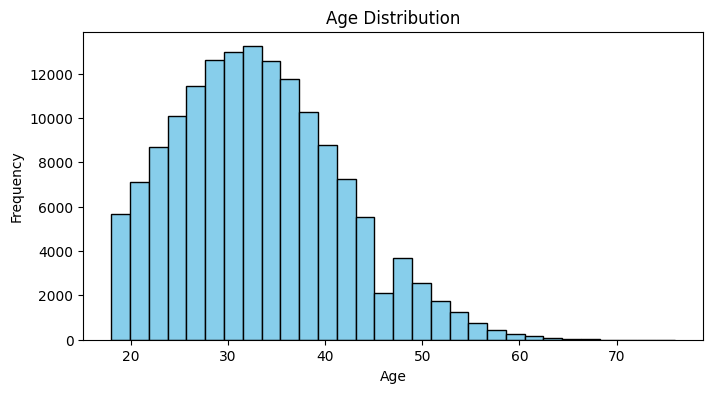

In [11]:
# Univariate analysis
import matplotlib.pyplot as plt

# Plotting the distribution of age
plt.figure(figsize=(8, 4))
plt.hist(df_fraud['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

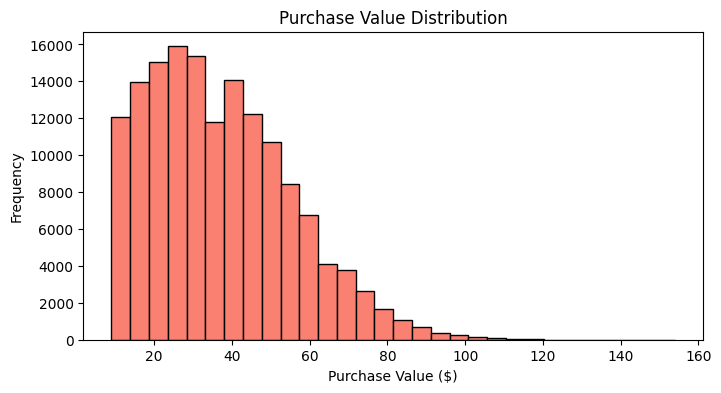

In [12]:
# Plotting the distribution of purchase_value
plt.figure(figsize=(8, 4))
plt.hist(df_fraud['purchase_value'], bins=30, color='salmon', edgecolor='black')
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value ($)')
plt.ylabel('Frequency')
plt.show()

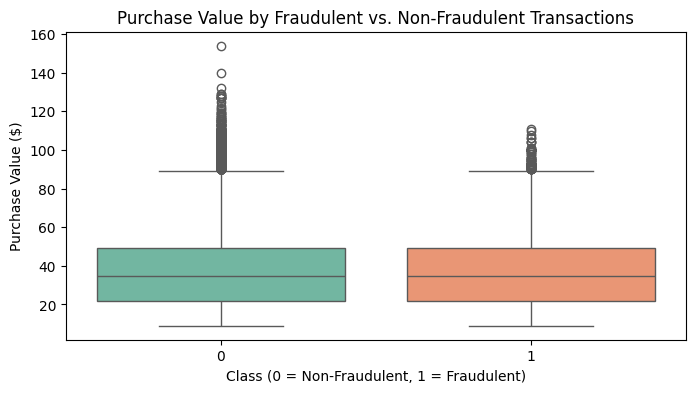

In [13]:
# Bivariate analysis
import seaborn as sns

# Boxplot to compare purchase_value across fraudulent (1) and non-fraudulent (0) transactions
plt.figure(figsize=(8, 4))
sns.boxplot(x='class', y='purchase_value', hue='class', data=df_fraud, palette='Set2', legend=False)
plt.title('Purchase Value by Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0 = Non-Fraudulent, 1 = Fraudulent)')
plt.ylabel('Purchase Value ($)')
plt.show()

# Merge Datasets for Geolocation Analysis

In [14]:
# Convert ip addresses to integers
import ipaddress

# Ensure IP addresses are in the correct format
df_fraud['ip_address'] = df_fraud['ip_address'].apply(lambda x: str(ipaddress.IPv4Address(int(x))))
df_ip['lower_bound_ip_address'] = df_ip['lower_bound_ip_address'].apply(lambda x: str(ipaddress.IPv4Address(int(x))))
df_ip['upper_bound_ip_address'] = df_ip['upper_bound_ip_address'].apply(lambda x: str(ipaddress.IPv4Address(int(x))))

df_fraud['ip_int'] = df_fraud['ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_ip['lower_ip_int'] = df_ip['lower_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df_ip['upper_ip_int'] = df_ip['upper_bound_ip_address'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [15]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,732758368
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,350311387
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,2621473820
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,228.234.6.235,0,3840542443
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,24.197.75.141,0,415583117


In [16]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country,lower_ip_int,upper_ip_int
0,1.0.0.0,1.0.0.255,Australia,16777216,16777471
1,1.0.1.0,1.0.1.255,China,16777472,16777727
2,1.0.2.0,1.0.3.255,China,16777728,16778239
3,1.0.4.0,1.0.7.255,Australia,16778240,16779263
4,1.0.8.0,1.0.15.255,China,16779264,16781311


In [17]:
# Merge on IP address range
merged_data = pd.merge_asof(
    df_fraud.sort_values('ip_int'),
    df_ip.sort_values('lower_ip_int'),
    left_on='ip_int',
    right_on='lower_ip_int',
    direction='backward'
)
merged_data = merged_data[merged_data['ip_int'] <= merged_data['upper_ip_int']]

In [ ]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,lower_bound_ip_address,upper_bound_ip_address,country,lower_ip_int,upper_ip_int
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.0.6.112,0,16778864,1.0.4.0,1.0.7.255,Australia,16778240.0,16779263.0
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.0.253.61,0,16842045,1.0.128.0,1.0.255.255,Thailand,16809984.0,16842751.0
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.1.3.136,0,16843656,1.1.2.0,1.1.3.255,China,16843264.0,16843775.0
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.2.118.236,0,16938732,1.2.64.0,1.2.127.255,China,16924672.0,16941055.0
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.2.248.208,0,16971984,1.2.128.0,1.2.255.255,Thailand,16941056.0,16973823.0


# Feature Engineering

In [19]:
# Transaction frequency and velocity
df_fraud['transaction_count'] = df_fraud.groupby('user_id')['purchase_time'].transform('count')
df_fraud['time_diff'] = df_fraud.groupby('user_id')['purchase_time'].diff().fillna(pd.Timedelta(seconds=0)).dt.total_seconds()

In [20]:
# Time based features
df_fraud['hour_of_day'] = df_fraud['purchase_time'].dt.hour
df_fraud['day_of_week'] = df_fraud['purchase_time'].dt.dayofweek

# Normalization and Scaling

In [21]:
# Standardizing continous features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_fraud[['purchase_value', 'age']] = scaler.fit_transform(df_fraud[['purchase_value', 'age']])

df_credit[['Amount', 'Time']] = scaler.fit_transform(df_credit[['Amount', 'Time']])

In [22]:
# One hot encoding for catagorical columns
df_fraud = pd.get_dummies(df_fraud, columns=['source', 'browser', 'sex'], drop_first=True)

In [23]:
# Save the cleaned and preprocessed datasets
df_fraud.to_csv('../data/fraud_data_processed.csv', index=False)
df_credit.to_csv('../data/credit_data_processed.csv', index=False)